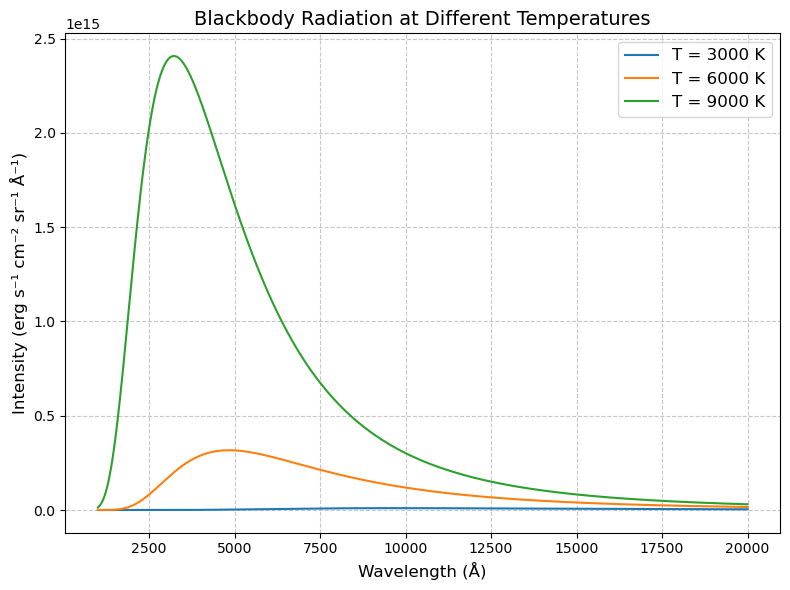

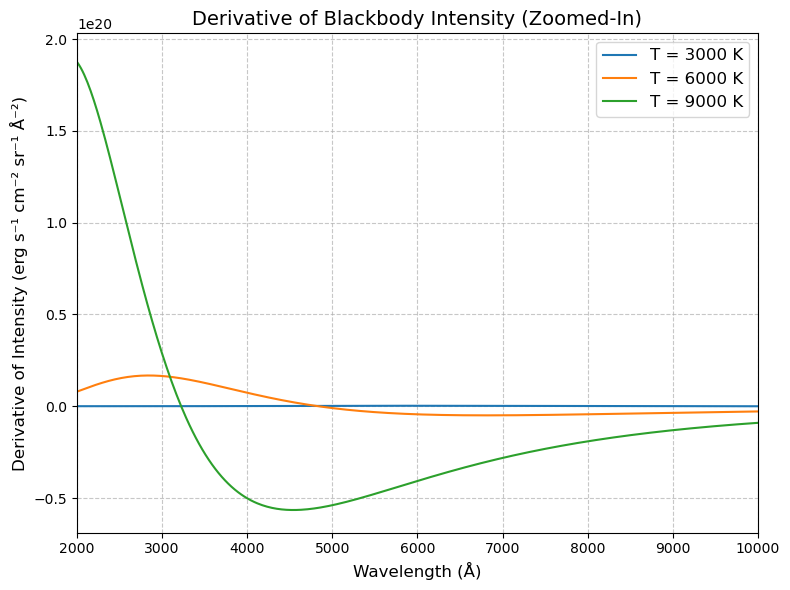

Peak wavelength for T = 3000 K: 9653.65 Å
Peak wavelength for T = 6000 K: 4822.82 Å
Peak wavelength for T = 9000 K: 3206.21 Å


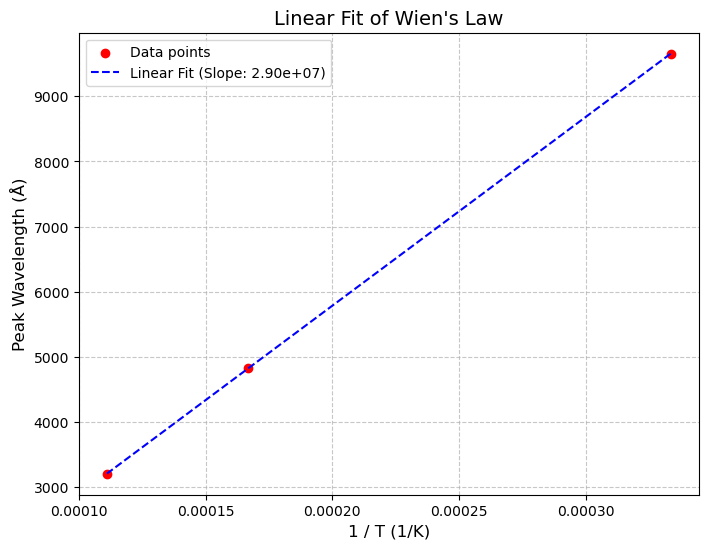

Slope of the fitted line: 2.90e+07 Å·K
Percentage difference from Wien's constant: 0.09%


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-27  # Planck's constant (erg·s)
c = 3.0e10     # Speed of light (cm/s)
k = 1.38e-16   # Boltzmann's constant (erg/K)

# List of blackbody temperatures in K
T_values = [3000, 6000, 9000]  

# Wavelength range: 1000 ≤ λ ≤ 20,000 Å (converted to cm)
wavelengths = np.linspace(1000 * 1e-8, 20000 * 1e-8, 1000)  # 1000 steps

# Planck's Law function for intensity
def Intensity(wavelength, T): 
    return (2 * h * c**2) / (wavelength**5) / (np.exp((h * c) / (wavelength * k * T)) - 1)

########### Plot 1 Intensity-> shows the intensity of the black body effective temperature over a given wavelength range
plt.figure(figsize=(8, 6))
for T in T_values:
    intensity_values = Intensity(wavelengths, T)  # Compute intensity
    plt.plot(wavelengths * 1e8, intensity_values, label=f'T = {T} K')  # Convert cm to Å

# Labels and formatting
plt.xlabel('Wavelength (Å)', fontsize=12)
plt.ylabel('Intensity (erg s⁻¹ cm⁻² sr⁻¹ Å⁻¹)', fontsize=12)
plt.title('Blackbody Radiation at Different Temperatures', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

############ Plot 2 Derivative-> show the derivative of the intensity equation over a given wavelength range
plt.figure(figsize=(8, 6))
for T in T_values:
    B_values = Intensity(wavelengths, T)  # Compute intensity
    dB_dlambda = np.gradient(B_values, wavelengths)  # Compute derivative
    plt.plot(wavelengths * 1e8, dB_dlambda, label=f'T = {T} K')  # Convert cm to Å

# Labels and formatting
plt.xlabel('Wavelength (Å)', fontsize=12)
plt.ylabel(r'Derivative of Intensity (erg s⁻¹ cm⁻² sr⁻¹ Å⁻²)', fontsize=12)
plt.title('Derivative of Blackbody Intensity (Zoomed-In)', fontsize=14)
plt.xlim(2000, 10000)  # Zoom in on the 2000Å–10,000Å range
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
################ Finding the peak wavelength (where the derivative is zero and changes sign)
peak_wavelengths = {}  # Dictionary to store peak wavelengths for each temperature

for i in range(len(T_values)): #loop through each temperature
    T = T_values[i] #current temperature
    B_values = Intensity(wavelengths, T) #compute intensity values
    dB_dlambda = np.gradient(B_values, wavelengths) #compute derivative of intensity values

    # Find where derivative crosses zero (change of sign)
    for j in range(len(dB_dlambda) - 1): #loop through derivative values, -1 is to keep the loop within bounds
        if dB_dlambda[j] > 0 and dB_dlambda[j + 1] < 0:  # check to see if there is a sign change from + to - (crosses the axis)
            peak_wavelength = wavelengths[j] * 1e8  # Convert cm to Å
            peak_wavelengths[T] = peak_wavelength #store result in dictionary
            break  # Stop at the first peak

# Print results
for T in T_values:
    print(f"Peak wavelength for T = {T} K: {peak_wavelengths[T]:.2f} Å")


################ Scatter plot with 1/T for each blackbody curve on x-axis and and the peak wavelength for all 3 distribution functions on
# the y axis
from scipy.stats import linregress

# Caluclate 1/T (x-axis)
inverse_T= [1/T for T in T_values]

# Previously computed peak wavelengths (y-axis)
peak_wavelengths = [peak_wavelengths[T] for T in T_values]  # Extract values

# Perform linear regression (y = mx + b)
slope, intercept, r_value, p_value, std_err = linregress(inverse_T, peak_wavelengths)

# Plot the scatter points
plt.figure(figsize=(8, 6))
plt.scatter(inverse_T, peak_wavelengths, color='red', label='Data points')

# Plot the best-fit line
fit_line = [slope * x + intercept for x in inverse_T]
plt.plot(inverse_T, fit_line, color='blue', linestyle='--', label=f'Linear Fit (Slope: {slope:.2e})')

# Labels and formatting
plt.xlabel('1 / T (1/K)', fontsize=12)
plt.ylabel('Peak Wavelength (Å)', fontsize=12)
plt.title("Linear Fit of Wien's Law", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the slope
print(f"Slope of the fitted line: {slope:.2e} Å·K")

# Compare with Wien’s constant
wien_constant = 2.898e7  # Å·K
print(f"Percentage difference from Wien's constant: {abs((slope - wien_constant) / wien_constant) * 100:.2f}%")


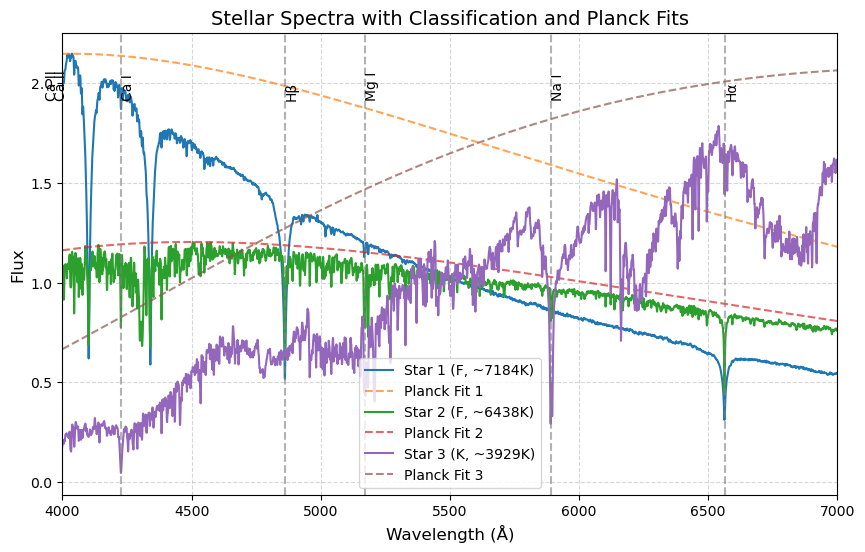

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in CGS units
h = 6.626e-27  # erg·s
c = 3.0e10     # cm/s
k_B = 1.381e-16  # erg/K
wien_constant = 0.29  # Wien's displacement constant in cm·K

# Spectral classification based on temperature
spectral_types = [
    (30000, "O"),
    (10000, "B"),
    (7500, "A"),
    (6000, "F"), 
    (5300, "G"), 
    (3700, "K"),
    (2400, "M")
]

# Function to classify stars based on temperature
def classify_star(T):
    for temp, spectral_class in spectral_types:
        if T >= temp:
            return spectral_class
    return "Unknown"

# Planck function to compute blackbody radiation curve
def planck(wavelength_cm, T):
    return ( (2.0 * h * c**2) / (wavelength_cm**5) ) / (np.exp((h * c) / (wavelength_cm * k_B * T)) - 1)

# List of star filenames
star_files = ["star1.txt", "star2.txt", "star3.txt"]

# Known spectral absorption lines
absorption_lines = {
    3934: "Ca II",
    3969: "Ca II", 
    4227: "Ca I",
    4861: "Hβ",
    5173: "Mg I",
    5890: "Na I", 
    6563: "Hα"
}

# Plot the spectra
plt.figure(figsize=(10, 6))

for i, file in enumerate(star_files):
    data = np.loadtxt(file)
    wavelength, flux = data[:, 0], data[:, 1]

    # Find peak wavelength
    peak_wavelength_A = wavelength[np.argmax(flux)]  # Å
    peak_wavelength_cm = peak_wavelength_A * 1e-8  # Convert Å to cm

    # Estimate temperature using Wien's Law
    estimated_temperature = wien_constant / peak_wavelength_cm

    # Classify the star
    spectral_class = classify_star(estimated_temperature)

    # Plot spectrum
    plt.plot(wavelength, flux, label=f'Star {i+1} ({spectral_class}, ~{int(estimated_temperature)}K)')
    
    # Overlay Planck curve (blackbody radiation curve)
    planck_flux = planck(wavelength * 1e-8, estimated_temperature)
    
    # Normalize Planck flux to match the observed flux scale
    # This ensures the blackbody curve aligns visually with the measured spectra
    planck_flux = planck_flux / np.max(planck_flux) * np.max(flux)  
    
    # Plot the Planck curve as a dashed line to differentiate it from the observed spectrum
    plt.plot(wavelength, planck_flux, linestyle='dashed', alpha=0.7, label=f'Planck Fit {i+1}')

# Annotate prominent absorption lines
for wl, label in absorption_lines.items():
    plt.axvline(x=wl, color='gray', linestyle='--', alpha=0.6)
    plt.text(wl, plt.ylim()[1] * 0.85, label, rotation=90, fontsize=10, verticalalignment='bottom')

# Formatting
plt.xlim(4000, 7000)
plt.xlabel("Wavelength (Å)", fontsize=12)
plt.ylabel("Flux", fontsize=12)
plt.title("Stellar Spectra with Classification and Planck Fits", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The reason the Planck curve doesn't fit well with the spectra of Star 1 and Star 3 is because it doesn't account for the star's atmosphere or other factors, like gas clouds, that can absorb certain wavelengths. These absorptions create dips in the spectrum, which are not captured by the smooth blackbody curve.